# Linear Regression Assignment

## Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

### Steps that we will follow:

- Reading and Understanding the data.
- Preparing the data for modelling(train-test split, rescaling, etc)
- Training the model
- Residual Analysis
- Predictions and evaluation on the test set

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.preprocessing import MinMaxScaler

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import statsmodels.api as sm

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [6]:
from sklearn.metrics import r2_score

# Step:1 Reading and Understanding the data

In [7]:
#read the dataset
bikes = pd.read_csv(r"C:\Users\DELL\Downloads\day.csv")
bikes.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

## Removing the columns that are not required

In [8]:
bikes = bikes.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

In [9]:
bikes.shape

(730, 12)

In [10]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


## changing the values of the values of some variables with appropriate values

In [11]:
bikes['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
bikes.head(10)

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0  spring   0     1        0        1           1           2  14.110847   
1  spring   0     1        0        2           1           2  14.902598   
2  spring   0     1        0        3           1           1   8.050924   
3  spring   0     1        0        4           1           1   8.200000   
4  spring   0     1        0        5           1           1   9.305237   
5  spring   0     1        0        6           0           1   8.378268   
6  spring   0     1        0        0           0           2   8.057402   
7  spring   0     1        0        1           1           2   6.765000   
8  spring   0     1        0        2           1           1   5.671653   
9  spring   0     1        0        3           1           1   6.184153   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600  
5  11.66045  51.8261   6.000868  1606  
6  10.44195  49.8696  11.304642  1510  
7   8.11270  53.5833  17.875868   959  
8   5.80875  43.4167  24.250650   822  
9   7.54440  48.2917  14.958889  1321

In [12]:
bikes['mnth'].replace({1:"January",2:"February",3:"March",4:"April", 5: "May", 6: "June", 7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"},inplace=True)
bikes.head(10)

season  yr     mnth  holiday  weekday  workingday  weathersit       temp  \
0  spring   0  January        0        1           1           2  14.110847   
1  spring   0  January        0        2           1           2  14.902598   
2  spring   0  January        0        3           1           1   8.050924   
3  spring   0  January        0        4           1           1   8.200000   
4  spring   0  January        0        5           1           1   9.305237   
5  spring   0  January        0        6           0           1   8.378268   
6  spring   0  January        0        0           0           2   8.057402   
7  spring   0  January        0        1           1           2   6.765000   
8  spring   0  January        0        2           1           1   5.671653   
9  spring   0  January        0        3           1           1   6.184153   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600  
5  11.66045  51.8261   6.000868  1606  
6  10.44195  49.8696  11.304642  1510  
7   8.11270  53.5833  17.875868   959  
8   5.80875  43.4167  24.250650   822  
9   7.54440  48.2917  14.958889  1321

In [13]:
bikes['weathersit'].replace({1:"Clear+Partly cloudy", 2:"Mist + Cloudy",3:"Light Snow, Light Rain + Thunderstorm",4:"Heavy Rain + Ice Pallets + Fog"},inplace=True)
bikes

season  yr      mnth  holiday  weekday  workingday           weathersit  \
0    spring   0   January        0        1           1        Mist + Cloudy   
1    spring   0   January        0        2           1        Mist + Cloudy   
2    spring   0   January        0        3           1  Clear+Partly cloudy   
3    spring   0   January        0        4           1  Clear+Partly cloudy   
4    spring   0   January        0        5           1  Clear+Partly cloudy   
..      ...  ..       ...      ...      ...         ...                  ...   
725  spring   1  December        0        5           1        Mist + Cloudy   
726  spring   1  December        0        6           0        Mist + Cloudy   
727  spring   1  December        0        0           0        Mist + Cloudy   
728  spring   1  December        0        1           1  Clear+Partly cloudy   
729  spring   1  December        0        2           1        Mist + Cloudy   

          temp     atemp      hum  windspeed   cnt  
0    14.110847  18.18125  80.5833  10.749882   985  
1    14.902598  17.68695  69.6087  16.652113   801  
2     8.050924   9.47025  43.7273  16.636703  1349  
3     8.200000  10.60610  59.0435  10.739832  1562  
4     9.305237  11.46350  43.6957  12.522300  1600  
..         ...       ...      ...        ...   ...  
725  10.420847  11.33210  65.2917  23.458911  2114  
726  10.386653  12.75230  59.0000  10.416557  3095  
727  10.386653  12.12000  75.2917   8.333661  1341  
728  10.489153  11.58500  48.3333  23.500518  1796  
729   8.849153  11.17435  57.7500  10.374682  2729  

[730 rows x 12 columns]

In [14]:
bikes['weekday'].replace({0: "Sunday", 1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday", 5:"Friday", 6: "Saturday"},inplace=True)
bikes.head(10)

season  yr     mnth  holiday    weekday  workingday           weathersit  \
0  spring   0  January        0     Monday           1        Mist + Cloudy   
1  spring   0  January        0    Tuesday           1        Mist + Cloudy   
2  spring   0  January        0  Wednesday           1  Clear+Partly cloudy   
3  spring   0  January        0   Thursday           1  Clear+Partly cloudy   
4  spring   0  January        0     Friday           1  Clear+Partly cloudy   
5  spring   0  January        0   Saturday           0  Clear+Partly cloudy   
6  spring   0  January        0     Sunday           0        Mist + Cloudy   
7  spring   0  January        0     Monday           1        Mist + Cloudy   
8  spring   0  January        0    Tuesday           1  Clear+Partly cloudy   
9  spring   0  January        0  Wednesday           1  Clear+Partly cloudy   

        temp     atemp      hum  windspeed   cnt  
0  14.110847  18.18125  80.5833  10.749882   985  
1  14.902598  17.68695  69.6087  16.652113   801  
2   8.050924   9.47025  43.7273  16.636703  1349  
3   8.200000  10.60610  59.0435  10.739832  1562  
4   9.305237  11.46350  43.6957  12.522300  1600  
5   8.378268  11.66045  51.8261   6.000868  1606  
6   8.057402  10.44195  49.8696  11.304642  1510  
7   6.765000   8.11270  53.5833  17.875868   959  
8   5.671653   5.80875  43.4167  24.250650   822  
9   6.184153   7.54440  48.2917  14.958889  1321

In [15]:
bikes.dtypes

season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

## changing the data types of some variables

In [16]:
bikes['season'] = bikes['season'].astype('category')
bikes['mnth'] = bikes['mnth'].astype('category')
bikes['weathersit'] = bikes['weathersit'].astype('category')
bikes['weekday'] = bikes['weekday'].astype('category')

In [17]:
bikes.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.500000    0.028767    0.690411   20.319259   23.726322   62.765175   
std      0.500343    0.167266    0.462641    7.506729    8.150308   14.237589   
min      0.000000    0.000000    0.000000    2.424346    3.953480    0.000000   
25%      0.000000    0.000000    0.000000   13.811885   16.889713   52.000000   
50%      0.500000    0.000000    1.000000   20.465826   24.368225   62.625000   
75%      1.000000    0.000000    1.000000   26.880615   30.445775   72.989575   
max      1.000000    1.000000    1.000000   35.328347   42.044800   97.250000   

        windspeed          cnt  
count  730.000000   730.000000  
mean    12.763620  4508.006849  
std      5.195841  1936.011647  
min      1.500244    22.000000  
25%      9.041650  3169.750000  
50%     12.125325  4548.500000  
75%     15.625589  5966.000000  
max     34.000021  8714.000000

In [18]:
bikes_num = bikes[['temp', 'atemp', 'hum', 'windspeed','cnt']]

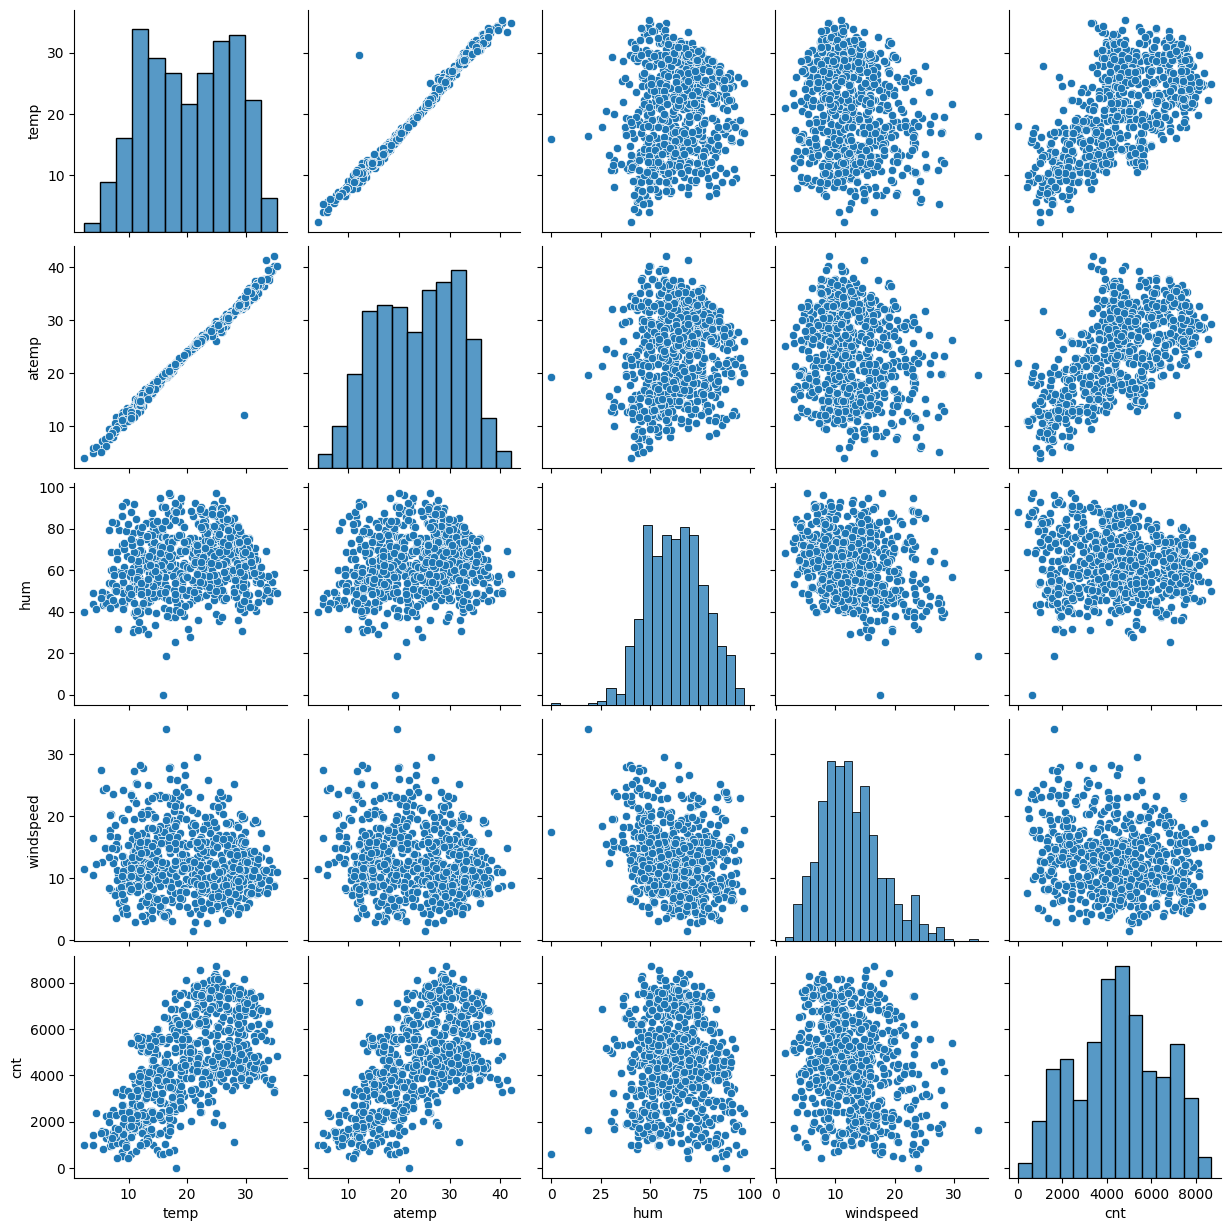

In [19]:
#Visualizing the numeric variables
sns.pairplot(bikes_num)
plt.show()

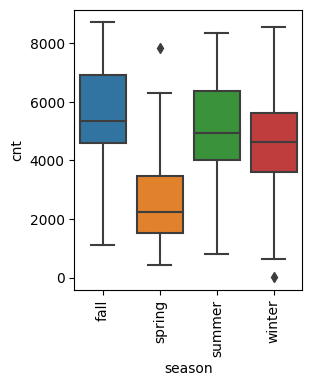

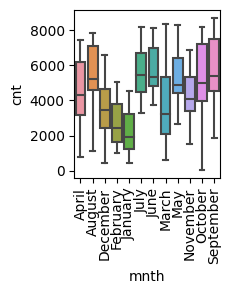

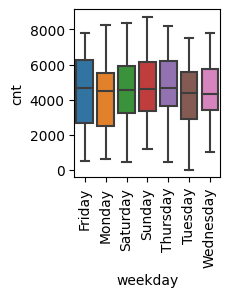

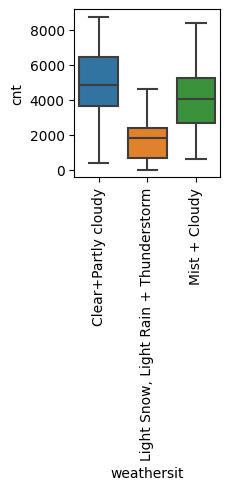

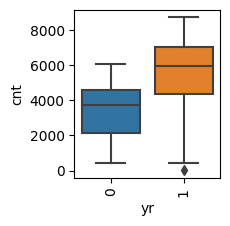

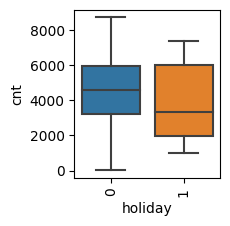

In [20]:
#Visualizing categorical variable

plt.figure(figsize=(10,8))
plt.subplot(2, 3, 1)
sns.boxplot(data= bikes, x= 'season', y= 'cnt')
plt.xticks(rotation=90)
plt.show()

plt.subplot(2, 3, 2)
sns.boxplot(data= bikes, x= 'mnth', y= 'cnt')
plt.xticks(rotation=90)
plt.show()

plt.subplot(2, 3, 3)
sns.boxplot(data= bikes, x= 'weekday', y= 'cnt')
plt.xticks(rotation=90)
plt.show()

plt.subplot(2, 3, 4)
sns.boxplot(data= bikes, x= 'weathersit', y= 'cnt')
plt.xticks(rotation=90)
plt.show()

plt.subplot(2, 3, 5)
sns.boxplot(data= bikes, x= 'yr', y= 'cnt')
plt.xticks(rotation=90)
plt.show()

plt.subplot(2, 3, 6)
sns.boxplot(data= bikes, x= 'holiday', y= 'cnt')
plt.xticks(rotation=90)
plt.show()

## Creating dummies for categorical Variables

In [21]:
Season=pd.get_dummies(bikes['season'],drop_first=True)
Month=pd.get_dummies(bikes['mnth'],drop_first=True)
Weather=pd.get_dummies(bikes['weathersit'],drop_first=True)
Week=pd.get_dummies(bikes['weekday'],drop_first=True)

## Concatenating with the main dataset

In [22]:
bikes=pd.concat([bikes,Season],axis=1)
bikes=pd.concat([bikes,Month],axis=1)
bikes=pd.concat([bikes,Weather],axis=1)
bikes=pd.concat([bikes,Week],axis=1)
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   season                                 730 non-null    category
 1   yr                                     730 non-null    int64   
 2   mnth                                   730 non-null    category
 3   holiday                                730 non-null    int64   
 4   weekday                                730 non-null    category
 5   workingday                             730 non-null    int64   
 6   weathersit                             730 non-null    category
 7   temp                                   730 non-null    float64 
 8   atemp                                  730 non-null    float64 
 9   hum                                    730 non-null    float64 
 10  windspeed                              730 non-null    float64

In [23]:
#Deleting the orginal columns season.weathersit,weekday,mnth
bikes.drop(['season'],axis=1,inplace=True)
bikes.drop(['weathersit'],axis=1,inplace=True)

bikes.drop(['weekday'],axis=1,inplace=True)

bikes.drop(['mnth'],axis=1,inplace=True)


bikes.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           1  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           1  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   spring  summer  ...  October  September  \
0       1       0  ...        0          0   
1       1       0  ...        0          0   
2       1       0  ...        0          0   
3       1       0  ...        0          0   
4       1       0  ...        0          0   

   Light Snow, Light Rain + Thunderstorm  Mist + Cloudy  Monday  Saturday  \
0                                      0              1       1         0   
1                                      0              1       0         0   
2                                      0              0       0         0   
3                                      0              0       0         0   
4                                      0              0       0         0   

   Sunday  Thursday  Tuesday  Wednesday  
0       0         0        0          0  
1       0         0        1          0  
2       0         0        0          1  
3       0         1        0          0  
4       0         0        0          0  

[5 rows x 30 columns]

In [24]:
bikes.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'August', 'December', 'February',
       'January', 'July', 'June', 'March', 'May', 'November', 'October',
       'September', 'Light Snow, Light Rain + Thunderstorm', 'Mist + Cloudy',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

# Step:2 Preparing the data for modelling

### Splitting into train-test

In [25]:
df_train, df_test = train_test_split(bikes, train_size= 0.7, random_state = 100)

In [26]:
df_train.shape
df_test.shape

(220, 30)

### Rescaling of Variables

In [27]:
# 1. Tnstantiate an object

scaler = MinMaxScaler()

# Creating a list for numerical variables

bikes_num = ['temp', 'atemp', 'hum', 'windspeed','cnt']

#2. Fit on the data

df_train[bikes_num] = scaler.fit_transform(df_train[bikes_num])
df_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           1  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   
111   0        0           0  0.345824  0.318819  0.751824   0.380981   

          cnt  spring  summer  ...  October  September  \
576  0.827658       0       0  ...        0          0   
426  0.465255       1       0  ...        0          0   
728  0.204096       1       0  ...        0          0   
482  0.482973       0       1  ...        0          0   
111  0.191095       0       1  ...        0          0   

     Light Snow, Light Rain + Thunderstorm  Mist + Cloudy  Monday  Saturday  \
576                                      0              0       0         0   
426                                      0              1       0         0   
728                                      0              0       1         0   
482                                      0              1       0         0   
111                                      0              1       0         0   

     Sunday  Thursday  Tuesday  Wednesday  
576       0         0        0          1  
426       1         0        0          0  
728       0         0        0          0  
482       1         0        0          0  
111       1         0        0          0  

[5 rows x 30 columns]

# Step: 3 Training the model

In [28]:
# X_train, y_train

y_train = df_train.pop('cnt')
X_train = df_train

In [29]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [30]:
lm = LinearRegression()

In [31]:
lm.fit(X_train, y_train)

LinearRegression()

In [32]:
#USING RFE APPROACH FOR FEATURE SELECTION

rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [33]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('August', False, 10),
 ('December', True, 1),
 ('February', False, 2),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 12),
 ('March', False, 15),
 ('May', False, 9),
 ('November', True, 1),
 ('October', False, 13),
 ('September', True, 1),
 ('Light Snow, Light Rain + Thunderstorm', True, 1),
 ('Mist + Cloudy', True, 1),
 ('Monday', False, 8),
 ('Saturday', False, 5),
 ('Sunday', False, 6),
 ('Thursday', False, 14),
 ('Tuesday', False, 7),
 ('Wednesday', False, 11)]

In [34]:
col= X_train.columns[rfe.support_]

In [35]:
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'December', 'January', 'July', 'November', 'September',
       'Light Snow, Light Rain + Thunderstorm', 'Mist + Cloudy'],
      dtype='object')

In [36]:
#Delete the columnd that rfe didnot select

X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'August', 'February', 'June', 'March', 'May',
       'October', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')

## Model:1

In [37]:
#Building the model
#Creating X_train dataframe with RFE selected variables

X_train_rfe = X_train[col]

#Adding constant

X_train_rfe_1 = sm.add_constant(X_train_rfe)

#Run the model
lm = sm.OLS(y_train, X_train_rfe_1).fit()

In [38]:
#Summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 01 May 2023   Prob (F-statistic):          8.15e-189
Time:                        11:48:59   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.3197      0.036      8.859      0.000       0.249       0.391
yr                                        0.2304      0.008     28.487      0.000       0.215       0.246
holiday                                  -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temp                                      0.4815      0.037     13.005      0.000       0.409       0.554
hum                                      -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed                                -0.1887      0.026     -7.315      0.000      -0.239      -0.138
spring                                   -0.0613      0.021     -2.881      0.004      -0.103      -0.019
summer                                    0.0423      0.015      2.761      0.006       0.012       0.072
winter                                    0.1019      0.018      5.656      0.000       0.067       0.137
December                                 -0.0355      0.018     -2.024      0.043      -0.070      -0.001
January                                  -0.0434      0.018     -2.393      0.017      -0.079      -0.008
July                                     -0.0553      0.018     -3.030      0.003      -0.091      -0.019
November                                 -0.0387      0.019     -2.057      0.040      -0.076      -0.002
September                                 0.0755      0.017      4.466      0.000       0.042       0.109
Light Snow, Light Rain + Thunderstorm    -0.2465      0.026     -9.331      0.000      -0.298      -0.195
Mist + Cloudy                            -0.0543      0.010     -5.194      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
#Checking VIF

Vif = pd.DataFrame()
X = X_train_rfe
Vif['Feautures'] = X.columns
Vif['VIF']= [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
Vif['VIF'] = round(Vif['VIF'],2)
Vif = Vif.sort_values(by = 'VIF', ascending = False)
Vif

Feautures    VIF
3                                     hum  30.89
2                                    temp  17.79
4                               windspeed   4.72
5                                  spring   4.37
7                                  winter   4.06
6                                  summer   2.82
14                          Mist + Cloudy   2.32
0                                      yr   2.09
11                               November   1.85
9                                 January   1.75
10                                   July   1.59
8                                December   1.56
12                              September   1.41
13  Light Snow, Light Rain + Thunderstorm   1.28
1                                 holiday   1.06

In [40]:
X_train_rfe = X_train_rfe.drop('December', axis= 1)

## Model:2

In [41]:
#Building the model
#Adding constant

X_train_rfe1 = sm.add_constant(X_train_rfe)

#Run the model
lm1 = sm.OLS(y_train, X_train_rfe1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.8
Date:                Mon, 01 May 2023   Prob (F-statistic):          4.41e-189
Time:                        11:48:59   Log-Likelihood:                 512.08
No. Observations:                 510   AIC:                            -994.2
Df Residuals:                     495   BIC:                            -930.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.3032      0.035      8.598      0.000       0.234       0.373
yr                                        0.2302      0.008     28.371      0.000       0.214       0.246
holiday                                  -0.0920      0.026     -3.582      0.000      -0.142      -0.042
temp                                      0.5055      0.035     14.369      0.000       0.436       0.575
hum                                      -0.1697      0.038     -4.497      0.000      -0.244      -0.096
windspeed                                -0.1858      0.026     -7.190      0.000      -0.237      -0.135
spring                                   -0.0562      0.021     -2.652      0.008      -0.098      -0.015
summer                                    0.0479      0.015      3.168      0.002       0.018       0.078
winter                                    0.0972      0.018      5.421      0.000       0.062       0.132
January                                  -0.0341      0.018     -1.936      0.053      -0.069       0.001
July                                     -0.0559      0.018     -3.057      0.002      -0.092      -0.020
November                                 -0.0236      0.017     -1.362      0.174      -0.058       0.010
September                                 0.0802      0.017      4.775      0.000       0.047       0.113
Light Snow, Light Rain + Thunderstorm    -0.2404      0.026     -9.131      0.000      -0.292      -0.189
Mist + Cloudy                            -0.0528      0.010     -5.047      0.000      -0.073      -0.032
==============================================================================
Omnibus:                       60.634   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.746
Skew:                          -0.640   Prob(JB):                     7.44e-31
Kurtosis:                       5.211   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
#Checking VIF

Vif = pd.DataFrame()
X = X_train_rfe
Vif['Feautures'] = X.columns
Vif['VIF']= [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
Vif['VIF'] = round(Vif['VIF'],2)
Vif = Vif.sort_values(by = 'VIF', ascending = False)
Vif

Feautures    VIF
3                                     hum  29.09
2                                    temp  16.80
4                               windspeed   4.72
5                                  spring   4.37
7                                  winter   3.78
6                                  summer   2.80
13                          Mist + Cloudy   2.29
0                                      yr   2.09
8                                 January   1.67
10                               November   1.60
9                                    July   1.59
11                              September   1.40
12  Light Snow, Light Rain + Thunderstorm   1.25
1                                 holiday   1.06

In [43]:
X_train_rfe = X_train_rfe.drop('hum', axis= 1)

## Model:3

In [44]:
#Building the model
#Adding constant

X_train_rfe2 = sm.add_constant(X_train_rfe)

#Run the model
lm1 = sm.OLS(y_train, X_train_rfe2).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 01 May 2023   Prob (F-statistic):          5.93e-186
Time:                        11:49:00   Log-Likelihood:                 501.87
No. Observations:                 510   AIC:                            -975.7
Df Residuals:                     496   BIC:                            -916.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.2208      0.031      7.190      0.000       0.160       0.281
yr                                        0.2344      0.008     28.540      0.000       0.218       0.251
holiday                                  -0.0929      0.026     -3.550      0.000      -0.144      -0.041
temp                                      0.4656      0.035     13.420      0.000       0.397       0.534
windspeed                                -0.1532      0.025     -6.061      0.000      -0.203      -0.104
spring                                   -0.0656      0.021     -3.055      0.002      -0.108      -0.023
summer                                    0.0413      0.015      2.690      0.007       0.011       0.071
winter                                    0.0802      0.018      4.493      0.000       0.045       0.115
January                                  -0.0390      0.018     -2.178      0.030      -0.074      -0.004
July                                     -0.0506      0.019     -2.718      0.007      -0.087      -0.014
November                                 -0.0212      0.018     -1.199      0.231      -0.056       0.014
September                                 0.0741      0.017      4.343      0.000       0.041       0.108
Light Snow, Light Rain + Thunderstorm    -0.2869      0.025    -11.625      0.000      -0.335      -0.238
Mist + Cloudy                            -0.0797      0.009     -9.109      0.000      -0.097      -0.062
==============================================================================
Omnibus:                       62.126   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.195
Skew:                          -0.653   Prob(JB):                     8.05e-32
Kurtosis:                       5.244   Cond. No.                         18.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
#Checking VIF

Vif = pd.DataFrame()
X = X_train_rfe
Vif['Feautures'] = X.columns
Vif['VIF']= [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
Vif['VIF'] = round(Vif['VIF'],2)
Vif = Vif.sort_values(by = 'VIF', ascending = False)
Vif

Feautures   VIF
2                                    temp  5.15
3                               windspeed  4.67
4                                  spring  2.76
6                                  winter  2.28
5                                  summer  2.24
0                                      yr  2.07
7                                 January  1.61
9                                November  1.60
8                                    July  1.59
12                          Mist + Cloudy  1.56
10                              September  1.35
11  Light Snow, Light Rain + Thunderstorm  1.08
1                                 holiday  1.06

In [46]:
X_train_rfe = X_train_rfe.drop('November', axis= 1)

## Model:4

In [47]:
#Building the model
#Adding constant

X_train_rfe3 = sm.add_constant(X_train_rfe)

#Run the model
lm1 = sm.OLS(y_train, X_train_rfe3).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Mon, 01 May 2023   Prob (F-statistic):          8.14e-187
Time:                        11:49:00   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.2154      0.030      7.088      0.000       0.156       0.275
yr                                        0.2343      0.008     28.517      0.000       0.218       0.250
holiday                                  -0.0968      0.026     -3.722      0.000      -0.148      -0.046
temp                                      0.4721      0.034     13.772      0.000       0.405       0.539
windspeed                                -0.1549      0.025     -6.135      0.000      -0.205      -0.105
spring                                   -0.0617      0.021     -2.905      0.004      -0.103      -0.020
summer                                    0.0434      0.015      2.845      0.005       0.013       0.073
winter                                    0.0757      0.017      4.335      0.000       0.041       0.110
January                                  -0.0383      0.018     -2.138      0.033      -0.073      -0.003
July                                     -0.0503      0.019     -2.706      0.007      -0.087      -0.014
September                                 0.0764      0.017      4.506      0.000       0.043       0.110
Light Snow, Light Rain + Thunderstorm    -0.2854      0.025    -11.575      0.000      -0.334      -0.237
Mist + Cloudy                            -0.0793      0.009     -9.067      0.000      -0.096      -0.062
==============================================================================
Omnibus:                       59.886   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.021
Skew:                          -0.638   Prob(JB):                     4.79e-30
Kurtosis:                       5.174   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
#Checking VIF

Vif = pd.DataFrame()
X = X_train_rfe
Vif['Feautures'] = X.columns
Vif['VIF']= [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
Vif['VIF'] = round(Vif['VIF'],2)
Vif = Vif.sort_values(by = 'VIF', ascending = False)
Vif

Feautures   VIF
2                                    temp  5.13
3                               windspeed  4.62
4                                  spring  2.75
5                                  summer  2.24
0                                      yr  2.07
6                                  winter  1.78
7                                 January  1.61
8                                    July  1.59
11                          Mist + Cloudy  1.56
9                               September  1.34
10  Light Snow, Light Rain + Thunderstorm  1.08
1                                 holiday  1.04

In [49]:
X_train_rfe = X_train_rfe.drop('January', axis= 1)

## Model:5

In [50]:
#Building the model
#Adding constant

X_train_rfe4 = sm.add_constant(X_train_rfe)

#Run the model
lm1 = sm.OLS(y_train, X_train_rfe4).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Mon, 01 May 2023   Prob (F-statistic):          5.06e-187
Time:                        11:49:00   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.1994      0.030      6.746      0.000       0.141       0.258
yr                                        0.2336      0.008     28.352      0.000       0.217       0.250
holiday                                  -0.0975      0.026     -3.736      0.000      -0.149      -0.046
temp                                      0.4910      0.033     14.770      0.000       0.426       0.556
windspeed                                -0.1479      0.025     -5.887      0.000      -0.197      -0.099
spring                                   -0.0672      0.021     -3.175      0.002      -0.109      -0.026
summer                                    0.0465      0.015      3.051      0.002       0.017       0.076
winter                                    0.0817      0.017      4.730      0.000       0.048       0.116
July                                     -0.0521      0.019     -2.790      0.005      -0.089      -0.015
September                                 0.0768      0.017      4.517      0.000       0.043       0.110
Light Snow, Light Rain + Thunderstorm    -0.2842      0.025    -11.487      0.000      -0.333      -0.236
Mist + Cloudy                            -0.0802      0.009     -9.146      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       59.182   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.016
Skew:                          -0.629   Prob(JB):                     7.92e-30
Kurtosis:                       5.173   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
#Checking VIF

Vif = pd.DataFrame()
X = X_train_rfe
Vif['Feautures'] = X.columns
Vif['VIF']= [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
Vif['VIF'] = round(Vif['VIF'],2)
Vif = Vif.sort_values(by = 'VIF', ascending = False)
Vif

Feautures   VIF
2                                    temp  5.09
3                               windspeed  4.60
5                                  summer  2.23
4                                  spring  2.08
0                                      yr  2.07
6                                  winter  1.78
7                                    July  1.58
10                          Mist + Cloudy  1.55
8                               September  1.34
9   Light Snow, Light Rain + Thunderstorm  1.08
1                                 holiday  1.04

In [52]:
X_train_rfe = X_train_rfe.drop('temp', axis= 1)

## Model:6

In [53]:
#Building the model
#Adding constant

X_train_rfe5 = sm.add_constant(X_train_rfe)

#Run the model
lm1 = sm.OLS(y_train, X_train_rfe5).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     160.8
Date:                Mon, 01 May 2023   Prob (F-statistic):          5.02e-149
Time:                        11:49:01   Log-Likelihood:                 406.16
No. Observations:                 510   AIC:                            -790.3
Df Residuals:                     499   BIC:                            -743.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.5837      0.017     34.708      0.000       0.551       0.617
yr                                        0.2472      0.010     25.204      0.000       0.228       0.266
holiday                                  -0.1005      0.031     -3.215      0.001      -0.162      -0.039
windspeed                                -0.1705      0.030     -5.676      0.000      -0.230      -0.112
spring                                   -0.3005      0.017    -17.823      0.000      -0.334      -0.267
summer                                   -0.0449      0.017     -2.693      0.007      -0.078      -0.012
winter                                   -0.0793      0.016     -4.941      0.000      -0.111      -0.048
July                                     -0.0127      0.022     -0.573      0.567      -0.056       0.031
September                                 0.0727      0.020      3.568      0.000       0.033       0.113
Light Snow, Light Rain + Thunderstorm    -0.2959      0.030     -9.988      0.000      -0.354      -0.238
Mist + Cloudy                            -0.0895      0.010     -8.541      0.000      -0.110      -0.069
==============================================================================
Omnibus:                       26.128   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.105
Skew:                          -0.293   Prob(JB):                     2.94e-12
Kurtosis:                       4.468   Cond. No.                         9.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We could see a huge drop in the r2 square value after removing 'temp' and increase in p value of 'july'. So, we will add 'temp' again and remove 'july'

## Model: 7

In [54]:
#Creating another model
col = ["yr", "temp", "holiday", "windspeed", "spring", "summer", "winter", "September", "Light Snow, Light Rain + Thunderstorm", "Mist + Cloudy" ]

X_train_rfe = X_train[col]

#Adding constant
X_train_sm = sm.add_constant(X_train_rfe)

#Fit the model
lr = sm.OLS(y_train, X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Mon, 01 May 2023   Prob (F-statistic):          1.47e-186
Time:                        11:49:01   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.1909      0.030      6.447      0.000       0.133       0.249
yr                                        0.2341      0.008     28.237      0.000       0.218       0.250
temp                                      0.4777      0.033     14.423      0.000       0.413       0.543
holiday                                  -0.0963      0.026     -3.668      0.000      -0.148      -0.045
windspeed                                -0.1481      0.025     -5.854      0.000      -0.198      -0.098
spring                                   -0.0554      0.021     -2.654      0.008      -0.096      -0.014
summer                                    0.0621      0.014      4.350      0.000       0.034       0.090
winter                                    0.0945      0.017      5.630      0.000       0.062       0.127
September                                 0.0910      0.016      5.566      0.000       0.059       0.123
Light Snow, Light Rain + Thunderstorm    -0.2850      0.025    -11.444      0.000      -0.334      -0.236
Mist + Cloudy                            -0.0787      0.009     -8.938      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       63.413   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.384
Skew:                          -0.674   Prob(JB):                     1.21e-31
Kurtosis:                       5.210   Cond. No.                         17.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
#Checking VIF

Vif = pd.DataFrame()
X = X_train_rfe
Vif['Feautures'] = X.columns
Vif['VIF']= [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
Vif['VIF'] = round(Vif['VIF'],2)
Vif = Vif.sort_values(by = 'VIF', ascending = False)
Vif

Feautures   VIF
3                              windspeed  4.60
1                                   temp  3.84
0                                     yr  2.07
4                                 spring  1.99
5                                 summer  1.90
6                                 winter  1.63
9                          Mist + Cloudy  1.55
7                              September  1.23
8  Light Snow, Light Rain + Thunderstorm  1.08
2                                holiday  1.04

# Step:4 Residual Analysis

<Axes: ylabel='Density'>

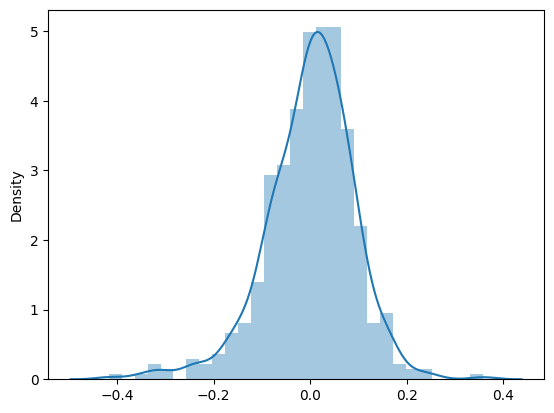

In [56]:
y_train_pred = lr.predict(X_train_sm)
res = y_train - y_train_pred
sns.distplot(res)

# Step:5 Predictions and evaluation on the test set

In [57]:
# Creating a list for numerical variables

bikes_num = ['temp', 'atemp', 'hum', 'windspeed','cnt']

#2. Fit on the data

df_test[bikes_num] = scaler.transform(df_test[bikes_num])
df_test.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
184   0        1           0  0.831783  0.769660  0.657364   0.084219   
535   1        0           1  0.901354  0.842587  0.610133   0.153728   
299   0        0           0  0.511964  0.496145  0.837699   0.334206   
221   0        0           1  0.881625  0.795343  0.437098   0.339570   
152   0        0           0  0.817246  0.741471  0.314298   0.537414   

          cnt  spring  summer  ...  October  September  \
184  0.692706       0       0  ...        0          0   
535  0.712034       0       1  ...        0          0   
299  0.303382       0       0  ...        1          0   
221  0.547400       0       0  ...        0          0   
152  0.569029       0       1  ...        0          0   

     Light Snow, Light Rain + Thunderstorm  Mist + Cloudy  Monday  Saturday  \
184                                      0              1       0         0   
535                                      0              0       0         0   
299                                      0              1       0         1   
221                                      0              0       0         0   
152                                      0              0       0         1   

     Sunday  Thursday  Tuesday  Wednesday  
184       0         0        0          1  
535       0         1        0          0  
299       0         0        0          0  
221       0         0        0          0  
152       0         0        0          0  

[5 rows x 30 columns]

In [58]:
df_test.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.481818    0.036364    0.640909    0.558718    0.532847    0.638221   
std      0.500809    0.187620    0.480828    0.233187    0.217401    0.148694   
min      0.000000    0.000000    0.000000    0.046591    0.025950    0.261915   
25%      0.000000    0.000000    0.000000    0.355429    0.344870    0.529197   
50%      0.000000    0.000000    1.000000    0.558172    0.544652    0.625590   
75%      1.000000    0.000000    1.000000    0.755981    0.713308    0.743798   
max      1.000000    1.000000    1.000000    0.984424    0.980934    1.002146   

        windspeed         cnt      spring      summer  ...     October  \
count  220.000000  220.000000  220.000000  220.000000  ...  220.000000   
mean     0.313293    0.522154    0.254545    0.263636  ...    0.086364   
std      0.159584    0.219163    0.436599    0.441609  ...    0.281541   
min     -0.042808    0.048205    0.000000    0.000000  ...    0.000000   
25%      0.198843    0.378595    0.000000    0.000000  ...    0.000000   
50%      0.300126    0.524678    0.000000    0.000000  ...    0.000000   
75%      0.402718    0.677750    1.000000    1.000000  ...    0.000000   
max      0.807474    0.963300    1.000000    1.000000  ...    1.000000   

        September  Light Snow, Light Rain + Thunderstorm  Mist + Cloudy  \
count  220.000000                             220.000000     220.000000   
mean     0.086364                               0.027273       0.318182   
std      0.281541                               0.163248       0.466833   
min      0.000000                               0.000000       0.000000   
25%      0.000000                               0.000000       0.000000   
50%      0.000000                               0.000000       0.000000   
75%      0.000000                               0.000000       1.000000   
max      1.000000                               1.000000       1.000000   

           Monday    Saturday      Sunday    Thursday     Tuesday   Wednesday  
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000  
mean     0.118182    0.172727    0.154545    0.140909    0.122727    0.159091  
std      0.323559    0.378873    0.362295    0.348721    0.328872    0.366595  
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000  

[8 rows x 30 columns]

In [59]:
y_test = df_test.pop('cnt')
X_test = df_test

In [60]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test

X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [61]:
#Making predictions on the chosen model

y_pred = lr.predict(X_test_new)

In [65]:
#Calculating residuals
res = y_test-y_pred
res

184    0.292007
535   -0.182872
299   -0.098296
221   -0.014350
152    0.005260
         ...   
702    0.031930
127   -0.025972
640    0.079411
72    -0.030862
653    0.145736
Length: 220, dtype: float64

Text(0.5, 0, 'Errors')

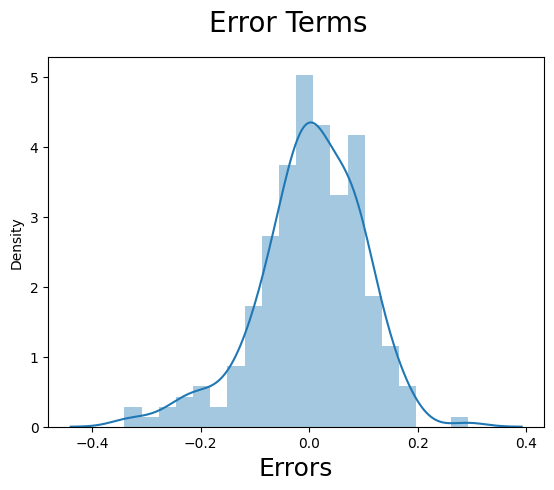

In [66]:
#Checking ASSUMPTION OF NORMALITY:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)       

In [63]:
#Evaluate the model
r2_score(y_true= y_test, y_pred = y_pred)

0.8038195990728842

Text(0, 0.5, 'y_pred')

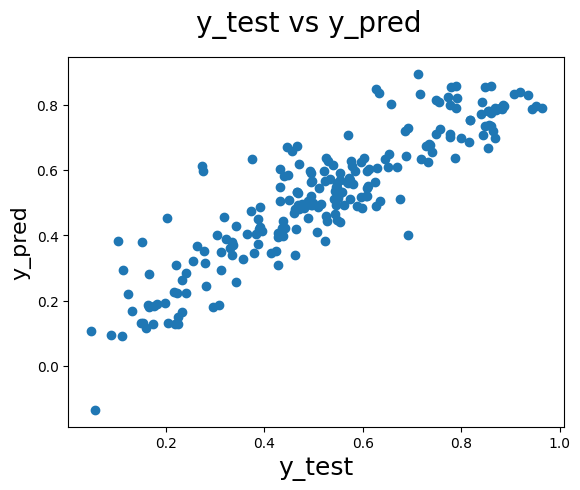

In [64]:
#CHECKING PREDICTED V/s TEST DATA 

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

# We can see that the equation for best fitted line is:

cnt = 0.2341* yr + 0.4777*temp - 0.0963*holiday - 0.1481*windspeed - 0.0554*spring + 0.0621*summer + 0.0945*winter + 0.0910*September - 0.2850*(Light Snow, Light Rain + Thunderstorm) - 0.0787*(Mist + Cloudy) 

We can see the demand for bikes depends mainly on below variables:

    -  yr
    -  temp
    -  holiday
    -  windspeed
    -  spring
    -  summer
    -  winter
    -  september
    -  Light Snow, Light Rain + Thunderstorm
    -  Mist + Cloudy

- Demand increases in accordance with yr, temp, summer, winter, september.
- Demand decreases in accordance with holiday, windspeed, spring, Light Snow, Light Rain + Thunderstorm, Mist + Cloudy